Score:  0.880344366186612
Test Data MAE % : 0.08818751212202619


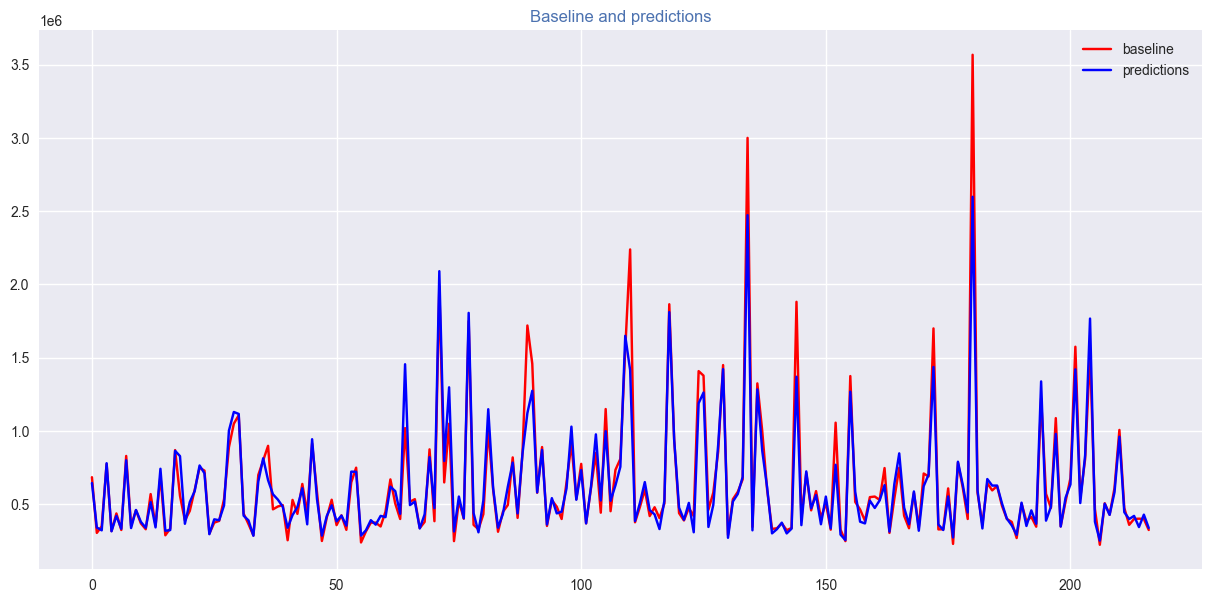

In [1]:
import pandas as pd
import tensorflow as tf
from constants import target_name, x_path, y_path, x_test_path, y_test_path, preprocessed_data
from libs.simple_processing import separate_target, split_train_test
from xgboost import XGBRegressor
from sklearn import metrics
# import sys, imp
# imp.reload(sys.modules['libs.simple_plotter'])
from libs.simple_plotter import plot_model_history

df = pd.read_csv(preprocessed_data)

length = int(len(df) * 0.99)
print("Dane testowe: ", length)

# Test data taken from the end of the dataset
TEST = df[length:]
DATA = df[:length]

X, y = separate_target(DATA, target_name)
Xt, yt = separate_target(TEST, target_name)

X.to_csv(x_path, index=False)
y.to_csv(y_path, index=False)
Xt.to_csv(x_test_path, index=False)
yt.to_csv(y_test_path, index=False)

X_train, X_valid, y_train, y_valid = split_train_test(X, y, train_size=0.65)

model = XGBRegressor(n_estimators=300
                     , learning_rate=0.03
                     , max_depth=10
                     , num_parallel_tree=10
                     )
model.fit(X_train, y_train)

score = model.score(X_valid, y_valid)
print("Score: ", score)

ypred = model.predict(Xt)
print('Test Data MAE % :', metrics.mean_absolute_percentage_error(yt, ypred))

plot_model_history(yt, ypred, "baseline", "predictions")

Dane testowe:  217
Score:  0.889520710105016
Test Data MAE % : 0.12075185471990196


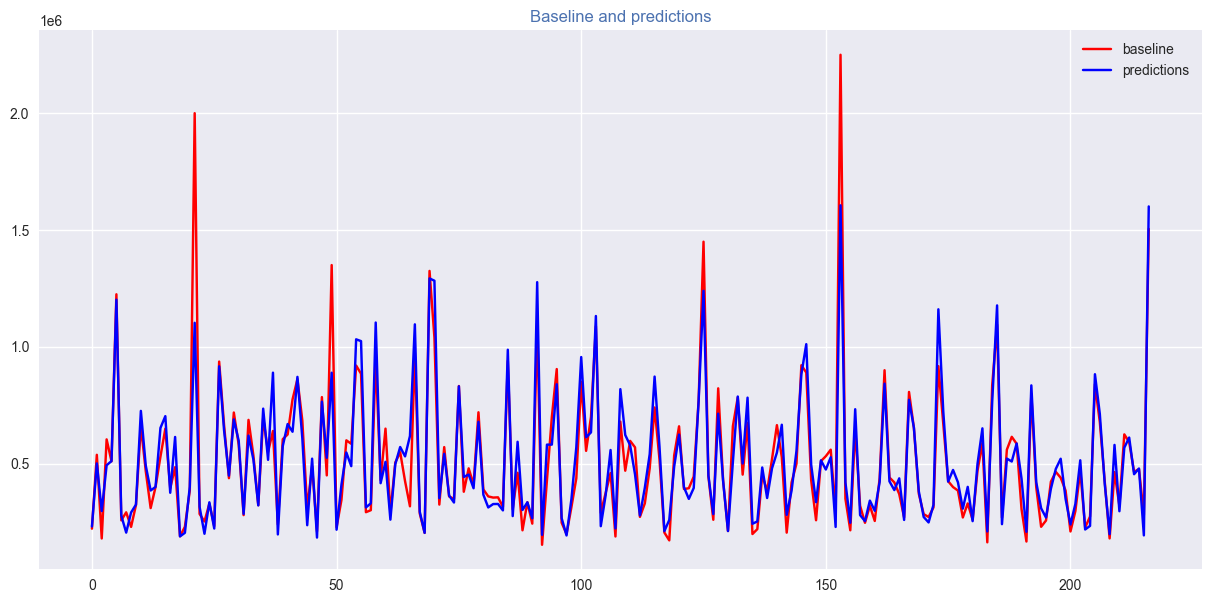

In [2]:
import pandas as pd
import tensorflow as tf
from constants import target_name, x_path, y_path, x_test_path, y_test_path, preprocessed_data
from libs.simple_processing import separate_target, split_train_test
from xgboost import XGBRegressor
from sklearn import metrics
# import sys, imp
# imp.reload(sys.modules['libs.simple_plotter'])
from libs.simple_plotter import plot_model_history

df = pd.read_csv(preprocessed_data)

length = int(len(df) * 0.99)
split_at = len(df) - length

print("Dane testowe: ", split_at)

# Test data taken from the beginning of the dataset
TEST = df[:split_at]
DATA = df[split_at:]

X, y = separate_target(DATA, target_name)
Xt, yt = separate_target(TEST, target_name)

X.to_csv(x_path, index=False)
y.to_csv(y_path, index=False)
Xt.to_csv(x_test_path, index=False)
yt.to_csv(y_test_path, index=False)

X_train, X_valid, y_train, y_valid = split_train_test(X, y, train_size=0.65)

tf.random.set_seed(7)

model = XGBRegressor(n_estimators=400
                     , learning_rate=0.03
                     , max_depth=10
                     , num_parallel_tree=10
                     )
model.fit(X_train, y_train)

score = model.score(X_valid, y_valid)
print("Score: ", score)

ypred = model.predict(Xt)
print('Test Data MAE % :', metrics.mean_absolute_percentage_error(yt, ypred))

plot_model_history(yt, ypred, "baseline", "predictions")

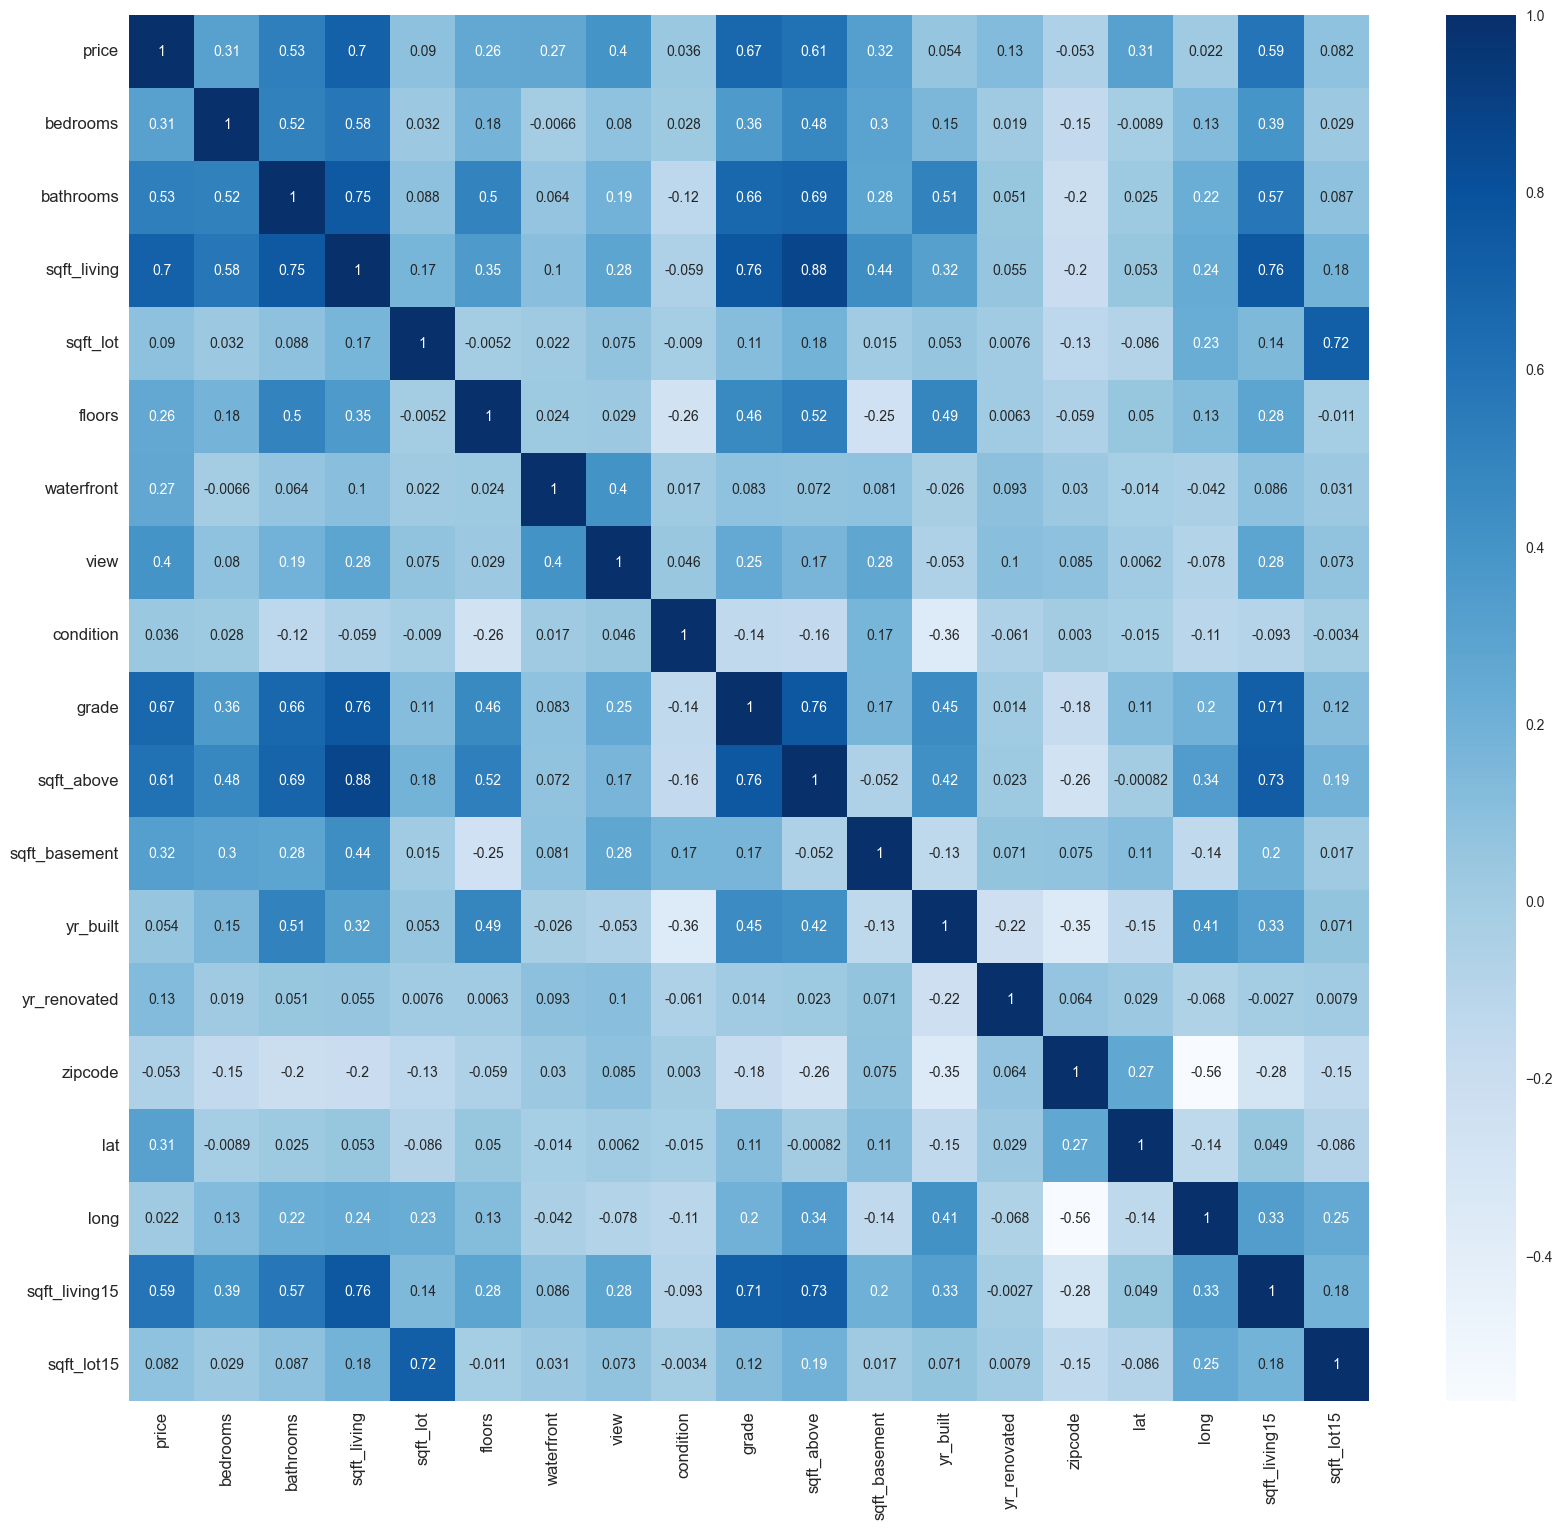

In [3]:
from libs.simple_analyzer import simple_heatmap

simple_heatmap(df)